# Классический OLS алгоритм

In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

В датасете `Admission_Predict_Ver1.1.csv` находятся данные об абитуриентах и вероятности приёма их в магистратуру.

Целевой переменной является вероятность приёма в университет — Chance of Admit (ranging from 0 to 1 )

Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [2]:
df = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

In [50]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Задание 11.1

Сколько всего абитуриентов в выборке?

In [5]:
df.shape[0]

500

## Задание 11.2

Составьте корреляциюнную матрицу перечисленных признаков вместе с целевой переменной, исключив столбец `Serial No.`

In [18]:
df.drop('Serial No.', axis=1).corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


корреляция между Chance of Admit и GRE Scores

In [19]:
df[['Chance of Admit ', 'GRE Score']].corr()

,Chance of Admit,GRE Score
Chance of Admit,1.000000,0.810351
GRE Score,0.810351,1.000000


корреляция между Chance of Admit и Research Experience

In [22]:
df[['Chance of Admit ', 'Research']].corr()

,Chance of Admit,Research
Chance of Admit,1.000000,0.545871
Research,0.545871,1.000000


корреляция между GRE Scores и Research Experience

In [23]:
df[['GRE Score', 'Research']].corr()

,GRE Score,Research
GRE Score,1.000000,0.563398
Research,0.563398,1.000000


## Задание 11.3

Какой признак сильнее всех скоррелирован с целевым параметром?

In [45]:
sorted_correlation = df.drop('Serial No.', axis=1).corr()['Chance of Admit '].sort_values(ascending=False)
sorted_correlation

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit , dtype: float64

In [46]:
# value
sorted_correlation[1]

0.8824125749045746

In [47]:
# column
sorted_correlation.index[1]

'CGPA'

## Задание 11.4

Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).

В каком случае признаки сильнее скоррелированы между собой?

In [48]:
df[df['Research'] == 1].corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.094895,-0.140706,-0.058624,-0.109004,0.010475,-0.049214,NaN,0.024458
GRE Score,-0.094895,1.000000,0.824170,0.614739,0.613318,0.443374,0.806720,NaN,0.802439
TOEFL Score,-0.140706,0.824170,1.000000,0.602445,0.629436,0.436199,0.784173,NaN,0.787180
University Rating,-0.058624,0.614739,0.602445,1.000000,0.723126,0.573881,0.692237,NaN,0.713094
SOP,-0.109004,0.613318,0.629436,0.723126,1.000000,0.591858,0.717750,NaN,0.708238
LOR,0.010475,0.443374,0.436199,0.573881,0.591858,1.000000,0.564794,NaN,0.588558
CGPA,-0.049214,0.806720,0.784173,0.692237,0.717750,0.564794,1.000000,NaN,0.892489
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,0.024458,0.802439,0.787180,0.713094,0.708238,0.588558,0.892489,NaN,1.000000


In [49]:
df[df['Research'] == 0].corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.165248,-0.185665,-0.093655,-0.199090,-0.018579,-0.138537,NaN,-0.002771
GRE Score,-0.165248,1.000000,0.680668,0.384715,0.371424,0.365864,0.678476,NaN,0.603827
TOEFL Score,-0.185665,0.680668,1.000000,0.495748,0.476563,0.470956,0.696774,NaN,0.622458
University Rating,-0.093655,0.384715,0.495748,1.000000,0.607496,0.484262,0.516427,NaN,0.428580
SOP,-0.199090,0.371424,0.476563,0.607496,1.000000,0.618680,0.547098,NaN,0.470188
LOR,-0.018579,0.365864,0.470956,0.484262,0.618680,1.000000,0.562517,NaN,0.542528
CGPA,-0.138537,0.678476,0.696774,0.516427,0.547098,0.562517,1.000000,NaN,0.752714
Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,-0.002771,0.603827,0.622458,0.428580,0.470188,0.542528,0.752714,NaN,1.000000


## Задание 11.5

В случае, когда корреляции между данными меньше, какие признаки наиболее скоррелированы с целевой переменной?
- TOEFL Score, SOP
- GRE Score, CGPA
- TOEFL Score, CGPA

In [76]:
x = df[df['Research'] == 0]

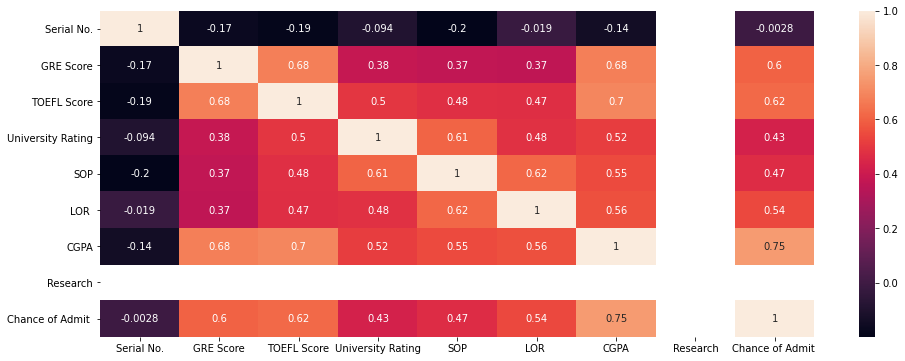

In [77]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=x.corr(), annot=True)

In [78]:
x[['TOEFL Score', 'SOP']].corr().iloc[0].sum()

1.4765629381821657

In [79]:
x[['GRE Score', 'CGPA']].corr().iloc[0].sum()

1.6784763287534128

In [80]:
x[['TOEFL Score', 'CGPA']].corr().iloc[0].sum()

1.6967737160680345

## Задание 11.6

Постройте _OLS_-регрессию `Chance of Admit` на выбранные в предыдущей задаче признаки без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [75]:
a = x[['TOEFL Score', 'CGPA', 'Chance of Admit ']]
y = x[['Chance of Admit ']]

,TOEFL Score,CGPA,Chance of Admit
Serial No.,-0.185665,-0.138537,-0.002771
GRE Score,0.680668,0.678476,0.603827
TOEFL Score,1.000000,0.696774,0.622458
University Rating,0.495748,0.516427,0.428580
SOP,0.476563,0.547098,0.470188
LOR,0.470956,0.562517,0.542528
CGPA,0.696774,1.000000,0.752714
Research,NaN,NaN,NaN
Chance of Admit,0.622458,0.752714,1.000000


In [92]:
x.shape

(220, 9)

In [93]:
# Создаем вектор из единиц для коэффициента w_0 и записываем все векторы в СТОЛБЦЫ матрицы признаков А
A = np.column_stack((np.ones(220), x['TOEFL Score'], x['CGPA']))

In [94]:
# Добавим настройку для удобного чтения значений А
np.set_printoptions(suppress=True)

In [95]:
# Создаем целевой вектор
y = x[['Chance of Admit ']]

In [96]:
# вычислим OLS оценку для коэффициентов
w_hat = np.linalg.inv(A.T @ A) @ A.T @ y
w_hat

,Chance of Admit
0,-1.044864
1,0.004427
2,0.148077


## Задание 11.7

Сделайте прогноз шансов поступления в университет для абитуриента с `TOEFL Score=107`, `CGPA=9.1`, используя модель, полученную в задаче 11.6 (используйте округленные значения признаков).

In [99]:
TOEFL_Score = 107
CGPA = 9.1

w_hat.iloc[0] + w_hat.iloc[1] * TOEFL_Score + w_hat.iloc[2] * CGPA

Chance of Admit     0.776359
dtype: float64

## Задание 11.8

Аналогично задаче 11.6 постройте OLS регрессию Chance of Admission на выбранные в задаче 2.11.5 признаки, однако теперь сперва стандартизируйте эти признаки. 

In [102]:
toefl_mean = x['TOEFL Score'].mean()
cgpa_mean = x['CGPA'].mean()
y_mean = y.mean()

In [103]:
# Центрирование
toefl = x['TOEFL Score'] - toefl_mean
cgpa = x['CGPA'] - cgpa_mean
y = y - y_mean

In [107]:
# вычисляем длины векторов для нормирования
toefl_norm = np.linalg.norm(toefl)
cgpa_norm = np.linalg.norm(cgpa)
y_norm = np.linalg.norm(y)

In [108]:
# Нормирование: делим каждый центрированный вектор на его длину
toefl = toefl / toefl_norm
cgpa = cgpa / cgpa_norm
y = y / y_norm

In [109]:
# Матрица центрированных признаков - БЕЗ константы!
A = np.column_stack((toefl, cgpa))

In [110]:
# OLS оценка коэффициентов центрированной регрессии
w_hat = np.linalg.inv(A.T @ A) @ A.T @ y.values
w_hat

array([[0.19044768],
       [0.62001517]])